In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
file_path = "data/laureates-1000.json"

with open(file_path, 'r') as file:
    data = json.load(file)

laureates = data['laureates']

In [10]:
age_data = []

for laureate in laureates:
    birth_date = laureate.get('birth', {}).get('date')
    if not birth_date or birth_date.startswith('0000'):  # Skip entries with missing or invalid birth dates
        continue
    
    for prize in laureate.get('nobelPrizes', []):
        award_year = prize.get('awardYear')
        category = prize.get('category', {}).get('en')
        if category in ['Literature', 'Peace']:  # Exclude 'Literature' and 'Peace'
            continue
        if award_year and birth_date:
            birth_year = birth_date.split('-')[0]
            if birth_year != "0000" and award_year.isdigit() and birth_year.isdigit():
                age_at_award = int(award_year) - int(birth_year)
                age_data.append({
                    'name': laureate.get('knownName', {}).get('en', 'Unknown'),
                    'birth_date': birth_date,
                    'award_year': award_year,
                    'age_at_award': age_at_award
                })

In [12]:
# Convert the age data into a DataFrame
df_age_data = pd.DataFrame(age_data)

In [13]:
df_age_data.head()

,name,birth_date,award_year,age_at_award
0,A. Michael Spence,1943-00-00,2001,58
1,Aage N. Bohr,1922-06-19,1975,53
2,Aaron Ciechanover,1947-10-01,2004,57
3,Aaron Klug,1926-08-11,1982,56
4,Abdus Salam,1926-01-29,1979,53


In [14]:
age_count = df_age_data['age_at_award'].value_counts().sort_index()

In [15]:
age_count.head()

age_at_award
25    1
31    4
32    2
33    2
34    2
Name: count, dtype: int64

In [16]:
age_count.tail()

age_at_award
88    1
89    2
90    3
96    1
97    1
Name: count, dtype: int64

In [17]:
age_count.to_csv('data/age_count.csv')

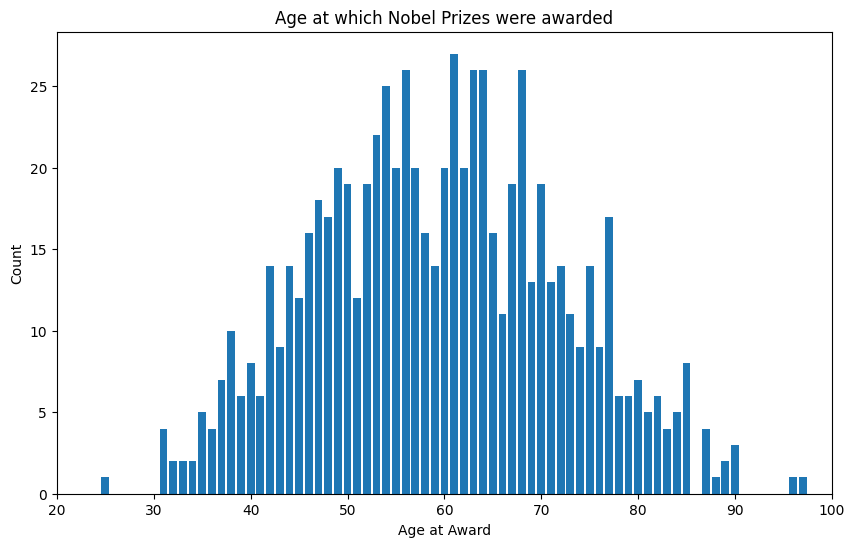

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(age_count.index, age_count.values)
plt.xlabel('Age at Award')
plt.ylabel('Count')
plt.title('Age at which Nobel Prizes were awarded')
plt.xlim(20, 100)
plt.show()

In [20]:
df_age_data['age_at_award'].describe()

count    739.000000
mean      59.410014
std       12.743177
min       25.000000
25%       50.000000
50%       59.000000
75%       68.000000
max       97.000000
Name: age_at_award, dtype: float64

In [21]:
df_age_data['age_at_award'].mode()

0    61
Name: age_at_award, dtype: int64

In [22]:
# The average age is 60, how many people were awarded at that age?
age_count.loc[60]

20

In [23]:
df_age_data.sort_values('age_at_award', ascending=False).head()

,name,birth_date,award_year,age_at_award
360,John B. Goodenough,1922-07-25,2019,97
55,Arthur Ashkin,1922-09-02,2018,96
408,Klaus Hasselmann,1931-10-25,2021,90
424,Leonid Hurwicz,1917-08-21,2007,90
665,Syukuro Manabe,1931-09-21,2021,90


In [24]:
df_age_data.sort_values('age_at_award', ascending=False).tail()

,name,birth_date,award_year,age_at_award
708,Werner Heisenberg,1901-12-05,1932,31
687,Tsung-Dao Lee,1926-11-24,1957,31
91,Carl D. Anderson,1905-09-03,1936,31
507,Paul A.M. Dirac,1902-08-08,1933,31
418,Lawrence Bragg,1890-03-31,1915,25
